In [1]:
!pip install fastf1
!pip install ipywidgets
!pip install fastf1 ipywidgets pandas numpy scikit-learn tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.8/148.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.8 MB/s eta 0:00:00


# Scrapping Data

In [ ]:
import fastf1
import pandas as pd

# Mengaktifkan cache
fastf1.Cache.enable_cache('path_to_cache_directory')

# Daftar semua trek yang ingin Anda ambil datanya
tracks = [
    'Bahrain', 'Jeddah', 'Melbourne', 'Imola', 'Miami',
    'Monaco', 'Barcelona', 'Montreal', 'Silverstone',
    'Hungaroring', 'Spa', 'Zandvoort', 'Monza',
    'Singapore', 'Suzuka', 'Austin', 'Mexico City',
    'Interlagos', 'Las Vegas', 'Abu Dhabi'
]

# Inisialisasi DataFrame kosong untuk menyimpan semua data kualifikasi
qualifying_data = pd.DataFrame()

# Loop melalui setiap trek dan memuat data kualifikasi
for track in tracks:
    try:
        # Memuat sesi kualifikasi untuk trek saat ini
        session = fastf1.get_session(2023, track, 'Q')  # Ganti 2024 dengan 2023 karena data 2024 mungkin belum tersedia
        session.load()

        # Ambil data lap dan tambahkan kolom untuk nama trek
        laps = session.laps[['Driver', 'LapTime', 'Compound', 'Sector1Time', 'Sector2Time', 'Sector3Time']] # Use 'Compound' instead of 'Tire'
        laps['Track'] = track  # Menambahkan nama trek ke DataFrame
        qualifying_data = pd.concat([qualifying_data, laps], ignore_index=True) # Use pd.concat instead of append

    except Exception as e:
        print(f"Error loading data for {track}: {e}")

# Mengonversi waktu lap dan sektor ke detik
qualifying_data['LapTime'] = qualifying_data['LapTime'].dt.total_seconds()
qualifying_data['Sector1Time'] = qualifying_data['Sector1Time'].dt.total_seconds()
qualifying_data['Sector2Time'] = qualifying_data['Sector2Time'].dt.total_seconds()
qualifying_data['Sector3Time'] = qualifying_data['Sector3Time'].dt.total_seconds()

# Menampilkan data kualifikasi yang telah dikumpulkan
print(qualifying_data)

# Menyimpan data ke file CSV jika diperlukan
qualifying_data.to_csv('qualifying_data_f1.csv', index=False)

core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.4.4]
INFO:fastf1.fastf1.core:Loading data for Bahrain Grand Prix - Qualifying [v3.4.4]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for sess

     Driver  LapTime Compound  Sector1Time  Sector2Time  Sector3Time  \
0       VER      NaN     SOFT          NaN          NaN          NaN   
1       VER      NaN     SOFT          NaN       53.666       38.509   
2       VER   91.295     SOFT       29.152       39.195       22.948   
3       VER  109.812     SOFT       35.615       44.953       29.244   
4       VER      NaN     SOFT          NaN       53.390       45.107   
...     ...      ...      ...          ...          ...          ...   
6839    SAR   84.722     SOFT       17.243       36.216       31.263   
6840    SAR  114.335     SOFT       28.024       43.757       42.554   
6841    SAR      NaN     SOFT          NaN       41.853       43.420   
6842    SAR   84.532     SOFT       17.177       36.185       31.170   
6843    SAR  106.738     SOFT       20.792       41.837       44.109   

          Track  
0       Bahrain  
1       Bahrain  
2       Bahrain  
3       Bahrain  
4       Bahrain  
...         ...  
6839  Abu

<ipython-input-20-08c8562c48c3>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laps['Track'] = track  # Menambahkan nama trek ke DataFrame


# FINAL PROJECT

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

# Load the uploaded dataset
df = '/content/drive/MyDrive/Kecerdasan Buatan/Las_Vegas_dan_Abu_Dhabi_quali_data.csv'
data = pd.read_csv(df)

In [5]:
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Driver       615 non-null    object 
 1   LapTime      446 non-null    float64
 2   Compound     615 non-null    object 
 3   Sector1Time  456 non-null    float64
 4   Sector2Time  615 non-null    float64
 5   Sector3Time  607 non-null    float64
 6   Track        615 non-null    object 
dtypes: float64(4), object(3)
memory usage: 33.8+ KB


(  Driver  LapTime Compound  Sector1Time  Sector2Time  Sector3Time      Track
 0    LEC      NaN     SOFT          NaN       35.396       46.181  Las Vegas
 1    LEC   94.898     SOFT       27.111       31.481       36.306  Las Vegas
 2    LEC  123.812     SOFT       35.688       39.250       48.874  Las Vegas
 3    LEC   94.072     SOFT       26.743       31.193       36.136  Las Vegas
 4    LEC  128.618     SOFT       39.095       39.481       50.042  Las Vegas,
 None)

In [6]:
import pandas as pd
data = data.dropna()
data

,Driver,LapTime,Compound,Sector1Time,Sector2Time,Sector3Time,Track
1,LEC,94.898,SOFT,27.111,31.481,36.306,Las Vegas
2,LEC,123.812,SOFT,35.688,39.250,48.874,Las Vegas
3,LEC,94.072,SOFT,26.743,31.193,36.136,Las Vegas
4,LEC,128.618,SOFT,39.095,39.481,50.042,Las Vegas
5,LEC,126.630,SOFT,41.902,41.743,42.985,Las Vegas
...,...,...,...,...,...,...,...
608,ZHO,114.559,SOFT,23.618,46.192,44.749,Abu Dhabi
610,SAR,84.722,SOFT,17.243,36.216,31.263,Abu Dhabi
611,SAR,114.335,SOFT,28.024,43.757,42.554,Abu Dhabi
613,SAR,84.532,SOFT,17.177,36.185,31.170,Abu Dhabi


In [7]:
data.head()

,Driver,LapTime,Compound,Sector1Time,Sector2Time,Sector3Time,Track
1,LEC,94.898,SOFT,27.111,31.481,36.306,Las Vegas
2,LEC,123.812,SOFT,35.688,39.250,48.874,Las Vegas
3,LEC,94.072,SOFT,26.743,31.193,36.136,Las Vegas
4,LEC,128.618,SOFT,39.095,39.481,50.042,Las Vegas
5,LEC,126.630,SOFT,41.902,41.743,42.985,Las Vegas


In [8]:
data.isnull().sum()

,0
Driver,0
LapTime,0
Compound,0
Sector1Time,0
Sector2Time,0
Sector3Time,0
Track,0


In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['LapTime']])

In [10]:
import numpy as np

def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 10  # Misalnya, menggunakan 10 langkah waktu
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.fit(X, y, epochs=150, batch_size=32, verbose=1)

Epoch 1/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0258
Epoch 2/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0233
Epoch 3/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0244
Epoch 4/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0228
Epoch 5/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0248
Epoch 6/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0232
Epoch 7/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0238
Epoch 8/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0256
Epoch 9/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0255
Epoch 10/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0202
Epoch 11/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0220
Epoch 12/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0255
Epoch 13/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0213
Epoch 14/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0237
Epoch 15/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0

In [13]:
predictions = model.predict(X)
predictions = scaler.inverse_transform(predictions)  # Kembalikan ke skala asli

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [14]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 10665.254477520248


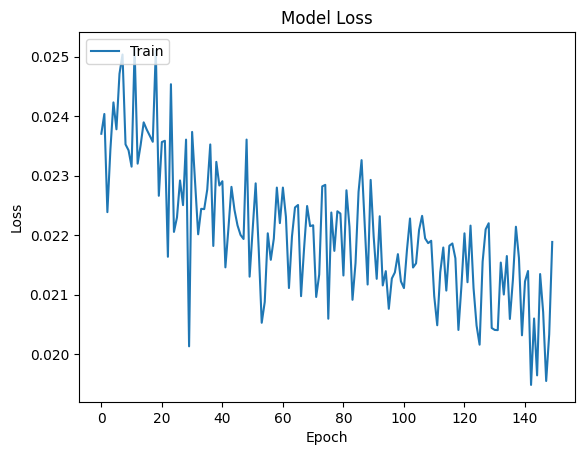

In [18]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['loss']) # Now this should work
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [19]:
import pandas as pd
import numpy as np

# Fungsi untuk memprediksi fastest lap dan driver
def predict_fastest_lap(track_data, model, scaler, time_step=10):
    # Normalisasi data
    scaled_data = scaler.transform(track_data[['LapTime']].values)

    # Buat dataset untuk LSTM
    X, _ = create_dataset(scaled_data, time_step)
    X = X.reshape(X.shape[0], X.shape[1], 1)  # Reshape untuk LSTM

    # Prediksi
    predictions = model.predict(X)
    predictions = scaler.inverse_transform(predictions)  # Kembalikan ke skala asli

    # Ambil waktu lap tercepat
    fastest_lap = np.min(predictions)

    # Temukan driver yang mencetak waktu lap tercepat
    fastest_driver_index = np.argmin(predictions)
    fastest_driver = track_data.iloc[fastest_driver_index]['Driver']

    return fastest_lap, fastest_driver

# Membaca data untuk trek Las Vegas dan Abu Dhabi
las_vegas_data = data[data['Track'] == 'Las Vegas']
abu_dhabi_data = data[data['Track'] == 'Abu Dhabi']

# Memprediksi fastest lap untuk masing-masing trek
fastest_lap_las_vegas, driver_las_vegas = predict_fastest_lap(las_vegas_data, model, scaler)
fastest_lap_abu_dhabi, driver_abu_dhabi = predict_fastest_lap(abu_dhabi_data, model, scaler)

print(f'Prediksi Fastest Lap for Las Vegas: {fastest_lap_las_vegas:.3f} seconds by {driver_las_vegas}')
print(f'Prediksi Fastest Lap for Abu Dhabi: {fastest_lap_abu_dhabi:.3f} seconds by {driver_abu_dhabi}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Prediksi Fastest Lap for Las Vegas: 90.316 seconds by SAI
Prediksi Fastest Lap for Abu Dhabi: 81.937 seconds by VER


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [20]:
loss = model.evaluate(X, y, verbose=0)
print(f'Loss: {loss}')

Loss: 0.019974982365965843


In [21]:
# prompt: download modelnya

# Assuming 'model' is your trained model and 'scaler' is your fitted scaler
# Save the model
model.save('f1_qualifying_model.h5')

# Save the scaler
import joblib
joblib.dump(scaler, 'f1_qualifying_scaler.pkl')

['f1_qualifying_scaler.pkl']